In [2]:
# LGBMRegressor
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns; sns.set()  # for plot styling
import locale
from difflib import SequenceMatcher
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [3]:
df_unificado=pd.read_excel("archivo_consolidado.xlsx")

In [14]:
df_final= df_unificado.drop(columns=['unidades','transacciones','muelle','fecha_de_venta','mes_string','tienda','marca','descripcion','objeto1','objeto2','objeto3','objeto4','objeto5','tipo_de_tienda','ubicacion_esp','ventas_sin_iva','precio_bruto_total','impuesto_total','descuento_total','tienda a','tienda b','personas_que_ingresan','Fecha de salida'])
df_final.dropna(inplace=True)

In [30]:
target="ventas"
temporal=["hora_entera","semana","anio_entero","dia_entero","April","August","February","January","July","June","March","May","November","October","September","December","abril","agosto","diciembre","enero","febrero","julio","junio","marzo","mayo","noviembre","octubre","septiembre","FECHA DIA_domingo","FECHA DIA_jueves","FECHA DIA_lunes","FECHA DIA_martes","FECHA DIA_miércoles","FECHA DIA_sábado","FECHA DIA_viernes"]
catego=["accesorios","juegos y juguetes","lujo","miscelanea","artesanias","cafe","calzado","botella","cambio","marroquineria","productos comerciali unisex","viaje_ejecutivo_negocio","tabaco_alcohol","regalos_obsequios","accesorios_de_mano","accesorios_belleza_cuidado","prendas_vestir","prendas_vestir_cabeza","libros_revistas_papel","cosas_hogar","comida_galguerias"]
catego2=['categoria 1','categoria 2','categoria 3','categoria 4','categoria 5','categoria 6','categoria 7','categoria 8','categoria 9','categoria 10','categoria 11','categoria 12','categoria 13','categoria 14','categoria 15','categoria 16','categoria 17','categoria 18','categoria 19','categoria 20','categoria 21','categoria 22','categoria 23','categoria 24','categoria 25','categoria 26','categoria 27','categoria 28','categoria 29','categoria 30','categoria 31','categoria 32','categoria 33','categoria 34','categoria 35','categoria 36','categoria 37','categoria 38','categoria 39','categoria 40','categoria 41','categoria 42','categoria 43','categoria 44','categoria 45','categoria 46','categoria 47','categoria 48','categoria 49','categoria 50','categoria 51','categoria 52','categoria 53','categoria 54','categoria 55','categoria 56','categoria 57','categoria 58','categoria 59','categoria 60','categoria 61','categoria 62','categoria 63','categoria 64','categoria 65','categoria 66','categoria 67','categoria 68','categoria 69','categoria 70','categoria 71','categoria 72','categoria 73','categoria 74','categoria 75','categoria 76','categoria 77','categoria 78','categoria 79','categoria 80','categoria 81','categoria 82','categoria 83','categoria 84','categoria 85','categoria 86','categoria 87','categoria 88','categoria 89','categoria 90','categoria 91','categoria 92','categoria 93','categoria 94','categoria 95','categoria 96','categoria 97','categoria 98','categoria 99','categoria 100','categoria 101','categoria 102','categoria 103']
marca=["marca1","marca2","marca3","marca4","marca5","marca6","marca7","marca8","marca9","marca10"]
#tienda=["tienda 1","tienda 10","tienda 11","tienda 12","tienda 2","tienda 3","tienda 4","tienda 5","tienda 6","tienda 7","tienda 8","tienda 9"]
tienda=["tienda 1","tienda 11","tienda 12","tienda 2","tienda 3","tienda 4","tienda 5","tienda 6","tienda 7","tienda 8","tienda 9"]
ubicacion=["A10-A12","A2-A4","A4","A5-A6","A6-A8","A8-A10"]
clima=["temperature","wind_speed","precipitation","cloud_cover"]
destino=["Destino_Amsterdam","Destino_Aruba","Destino_Asunción","Destino_Atlanta","Destino_Balboa","Destino_Barcelona","Destino_Belo Horizonte (Brasil)","Destino_Boston","Destino_Bridgetown-Barbados","Destino_Buenos aires","Destino_Cancun","Destino_Caracas","Destino_Ciud. Panamá","Destino_Cochabamba","Destino_Curacao - Willemstad","Destino_Dallas","Destino_Estambul","Destino_Fort Lauderdale","Destino_Frankfurt","Destino_Guadalajara","Destino_Guatemala","Destino_Guayaquil","Destino_Habana","Destino_Harlingen","Destino_Houston","Destino_La Paz","Destino_La Romana (Rep. Dominicana)","Destino_Lima","Destino_Londres","Destino_Los Angeles","Destino_Madrid","Destino_Manaos","Destino_Maturín","Destino_Mendoza (Argentina)","Destino_Mexico","Destino_Miami","Destino_Monterrey","Destino_Montevideo","Destino_Montreal","Destino_Mérida (México)","Destino_Nueva York","Destino_Orlando","Destino_Paris","Destino_Phoenix (EEUU)","Destino_Phoenix-Mesa (Arizona)","Destino_Porto Alegre","Destino_Punta Cana","Destino_Quito","Destino_Río De Janeiro","Destino_San Antonio (Texas)","Destino_San José","Destino_San Juan Puerto Rico","Destino_San Salvador","Destino_Santa Clara (Cuba)","Destino_Santa Cruz de la Sierra","Destino_Santiago","Destino_Santiago de los Caballeros","Destino_Santo Domingo","Destino_Santo Domingo (La Isabela)","Destino_Sao Pablo","Destino_Toronto","Destino_Trujillo (Perú)","Destino_Washington","Destino_Yuma (Arizona)"]
tipo_aerolinea=["Tipo aerolínea_Charter","Tipo aerolínea_Legacy","Tipo aerolínea_Low Cost","Tipo aerolínea_Regional"]
#aerolinea=["AEROLÍNEA_AEROLINEAS ARGENTINAS  S.A.","AEROLÍNEA_AEROLÍNEA DE VUELO CHARTER","AEROLÍNEA_AEROMEXICO S.A.","AEROLÍNEA_AIR CANADA S.A.","AEROLÍNEA_AIR EUROPA","AEROLÍNEA_AIR FRANCE","AEROLÍNEA_AMERICAN AIRLINES INC.","AEROLÍNEA_ARAJET","AEROLÍNEA_AVIANCA S.A","AEROLÍNEA_AZUL BRAZILIAN AIRLINES","AEROLÍNEA_COPA AIRLINES S.A.","AEROLÍNEA_DELTA AIR LINES INC.","AEROLÍNEA_GLOBAL REPS LTDA","AEROLÍNEA_IBERIA S.A.","AEROLÍNEA_ITA Transportes Aéreos","AEROLÍNEA_JET MAGIC","AEROLÍNEA_JETBLUE AIRWAYS CORPORATION","AEROLÍNEA_JETSMART AIRLINES SPA SUCURSAL COLOMBIA","AEROLÍNEA_KLM CIA","AEROLÍNEA_LATAM AIRLINES","AEROLÍNEA_LINEA AEREA DE SERVICIO EJECUTIVO LASER","AEROLÍNEA_LUFTHANSA S.A.","AEROLÍNEA_MENZIES AVIATION COLOMBIA S.A.S","AEROLÍNEA_PLUS ULTRA LÍNEAS AÉREAS","AEROLÍNEA_SAI S.A.","AEROLÍNEA_SATENA","AEROLÍNEA_SKY AIRLINES","AEROLÍNEA_SKY CANA","AEROLÍNEA_SPIRIT AIRLINES INC","AEROLÍNEA_TITAN AIRWAYS","AEROLÍNEA_TRANSAEREO S.A.S","AEROLÍNEA_TURKISH AIRLINES","AEROLÍNEA_TURPIAL AIRLINES","AEROLÍNEA_UNITED AIR LINES INC","AEROLÍNEA_VIVA AIRLINES PERU S.A.C SUCURSAL COL","AEROLÍNEA_VIVA COLOMBIA S.A.","AEROLÍNEA_VIVAAEROBUS","AEROLÍNEA_VOLARIS","AEROLÍNEA_VOLARIS COSTA RICA","AEROLÍNEA_WINGO S.A."]
aerolinea=["AEROLÍNEA_AEROLINEAS ARGENTINAS  S.A.","AEROLÍNEA_AEROLÍNEA DE VUELO CHARTER","AEROLÍNEA_AEROMEXICO S.A.","AEROLÍNEA_AIR CANADA S.A.","AEROLÍNEA_AIR EUROPA","AEROLÍNEA_AIR FRANCE","AEROLÍNEA_AMERICAN AIRLINES INC.","AEROLÍNEA_ARAJET","AEROLÍNEA_AVIANCA S.A","AEROLÍNEA_AZUL BRAZILIAN AIRLINES","AEROLÍNEA_COPA AIRLINES S.A.","AEROLÍNEA_DELTA AIR LINES INC.","AEROLÍNEA_GLOBAL REPS LTDA","AEROLÍNEA_IBERIA S.A.","AEROLÍNEA_ITA Transportes Aéreos","AEROLÍNEA_JET MAGIC","AEROLÍNEA_JETBLUE AIRWAYS CORPORATION","AEROLÍNEA_JETSMART AIRLINES SPA SUCURSAL COLOMBIA","AEROLÍNEA_LATAM AIRLINES","AEROLÍNEA_LINEA AEREA DE SERVICIO EJECUTIVO LASER","AEROLÍNEA_LUFTHANSA S.A.","AEROLÍNEA_MENZIES AVIATION COLOMBIA S.A.S","AEROLÍNEA_PLUS ULTRA LÍNEAS AÉREAS","AEROLÍNEA_SAI S.A.","AEROLÍNEA_SKY AIRLINES","AEROLÍNEA_SKY CANA","AEROLÍNEA_SPIRIT AIRLINES INC","AEROLÍNEA_TITAN AIRWAYS","AEROLÍNEA_TRANSAEREO S.A.S","AEROLÍNEA_TURKISH AIRLINES","AEROLÍNEA_TURPIAL AIRLINES","AEROLÍNEA_VIVA AIRLINES PERU S.A.C SUCURSAL COL","AEROLÍNEA_VIVA COLOMBIA S.A.","AEROLÍNEA_VIVAAEROBUS","AEROLÍNEA_VOLARIS","AEROLÍNEA_VOLARIS COSTA RICA","AEROLÍNEA_WINGO S.A."]

In [6]:
#categorical_features=temporal+catego+catego2+marca+tienda+ubicacion+destino+tipo_aerolinea+aerolinea
categorical_features=temporal+catego+marca+tienda+ubicacion+destino+tipo_aerolinea+aerolinea
numerica=["temperature","wind_speed","precipitation","cloud_cover","Pasajeros saliendo"]

## Modelo con todas las variables

In [15]:
target2=["ventas"]
drop=target2#+catego2+aerolinea

In [16]:
X = df_final.drop(columns=drop)
y = df_final['ventas']
# X['transacciones'].fillna(0, inplace=True)

# drop_cols = X.isna().sum().to_frame()
# drop_cols =drop_cols.loc[drop_cols[0] > 0]
# X = X.drop(columns=drop_cols.index.array)
# X.isna().sum().to_frame()

X_train = X[X['anio_entero']==2022]
X_test = X[X['anio_entero']==2023]
y_train = y[X['anio_entero']==2022]
y_test = y[X['anio_entero']==2023]

In [17]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10]
}

lgbm = lgb.LGBMRegressor()

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 71238, number of used features: 140
[LightGBM] [Info] Start training from score 22214582.418758


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 5, 10],
                         'min_data_in_leaf': [30, 50, 100],
                         'num_leaves': [31, 50, 70], 'reg_alpha': [0.1, 0.5]},
             scoring='r2', verbose=1)

In [18]:
# Mejores parámetros LBBMRegressor sin categorias
best_params_lgbm_con_vuelos = grid_search.best_params_
best_model_lgbm__con_vuelos = grid_search.best_estimator_

print(f"Mejores parámetros encontrados: {best_params_lgbm_con_vuelos}")

Mejores parámetros encontrados: {'learning_rate': 0.05, 'max_depth': -1, 'min_data_in_leaf': 100, 'num_leaves': 70, 'reg_alpha': 0.1}


In [19]:
# Evaluar para train y test. MAE, RMSE y R2
y_train_pred = best_model_lgbm__con_vuelos.predict(X_train)
y_test_pred = best_model_lgbm__con_vuelos.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MAE train: {mae_train}")
print(f"MAE test: {mae_test}")
print()
print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")
print()
print(f"R2 train: {r2_train}")
print(f"R2 test: {r2_test}")

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
MAE train: 7808426.9394024275
MAE test: 11216316.69524645

RMSE train: 15335847.97661613
RMSE test: 20567723.23301442

R2 train: 0.8471105818909944
R2 test: 0.7525785360831239


In [20]:
import joblib

# Supongamos que 'modelo' es tu modelo entrenado
# Guardar el modelo en un archivo
joblib.dump(best_model_lgbm__con_vuelos, 'modelo_completo.joblib')

['modelo_completo.joblib']

In [21]:
import shap

In [ ]:
best_model_lgbm__con_vuelos

In [23]:
#def model(X):
#    return best_model_lgbm__con_vuelos.predict_proba(X)[:,1]

explainer = shap.TreeExplainer(best_model_lgbm__con_vuelos)
shap_values = explainer.shap_values(X_test)

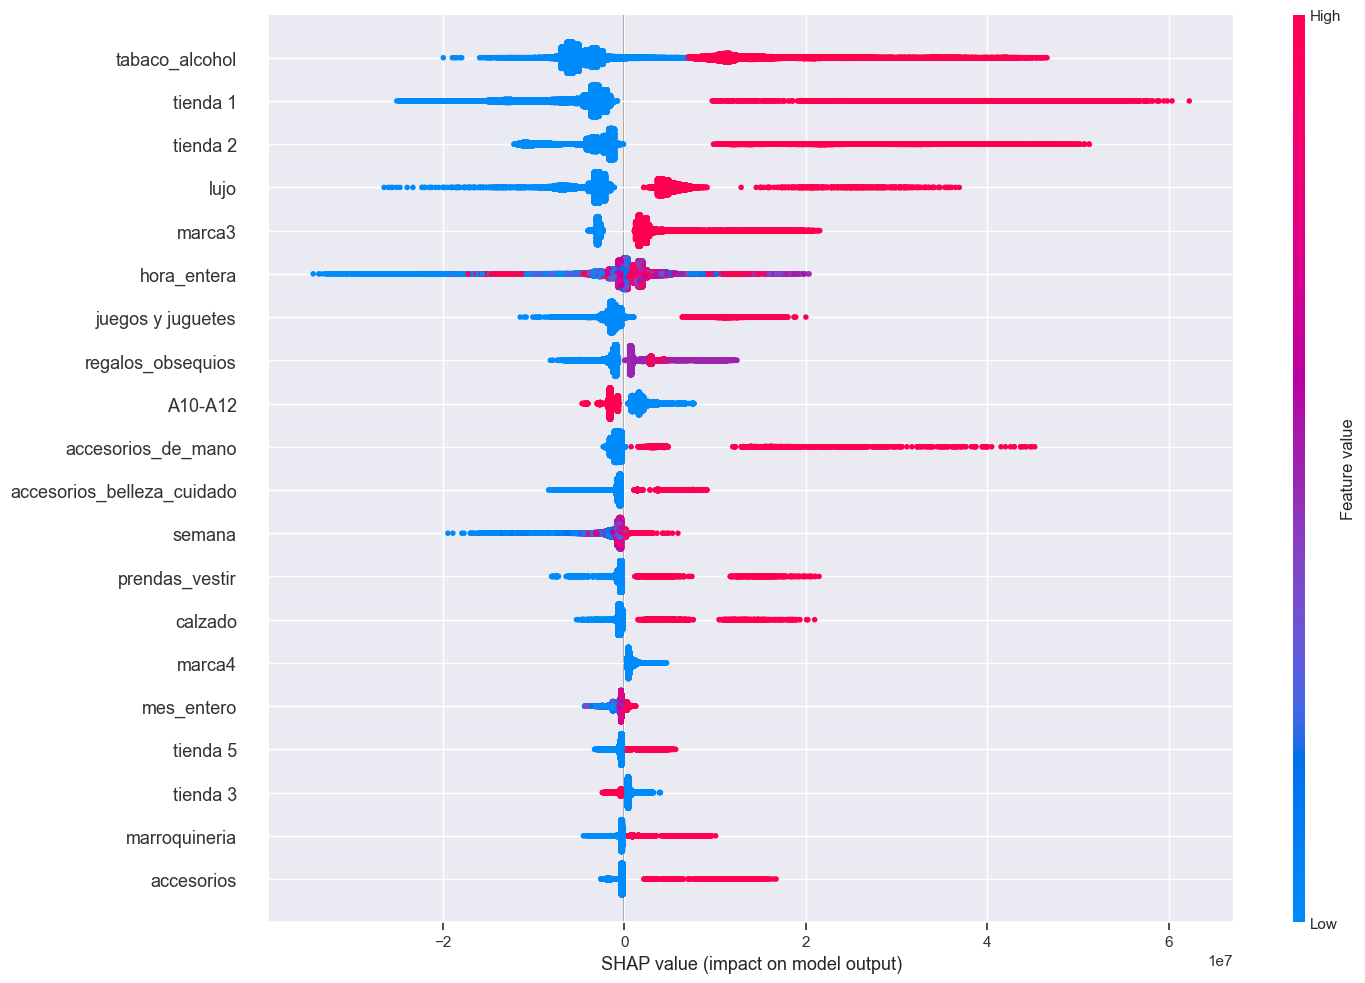

In [25]:
shap.summary_plot(shap_values, X_test, plot_size=(15, 10))

In [26]:
importances =pd.DataFrame({'feature': X_test.columns.array, 'score': best_model_lgbm__con_vuelos.feature_importances_})
importances.sort_values(by='score', ascending=False, inplace=True)

plot = importances.head(10)

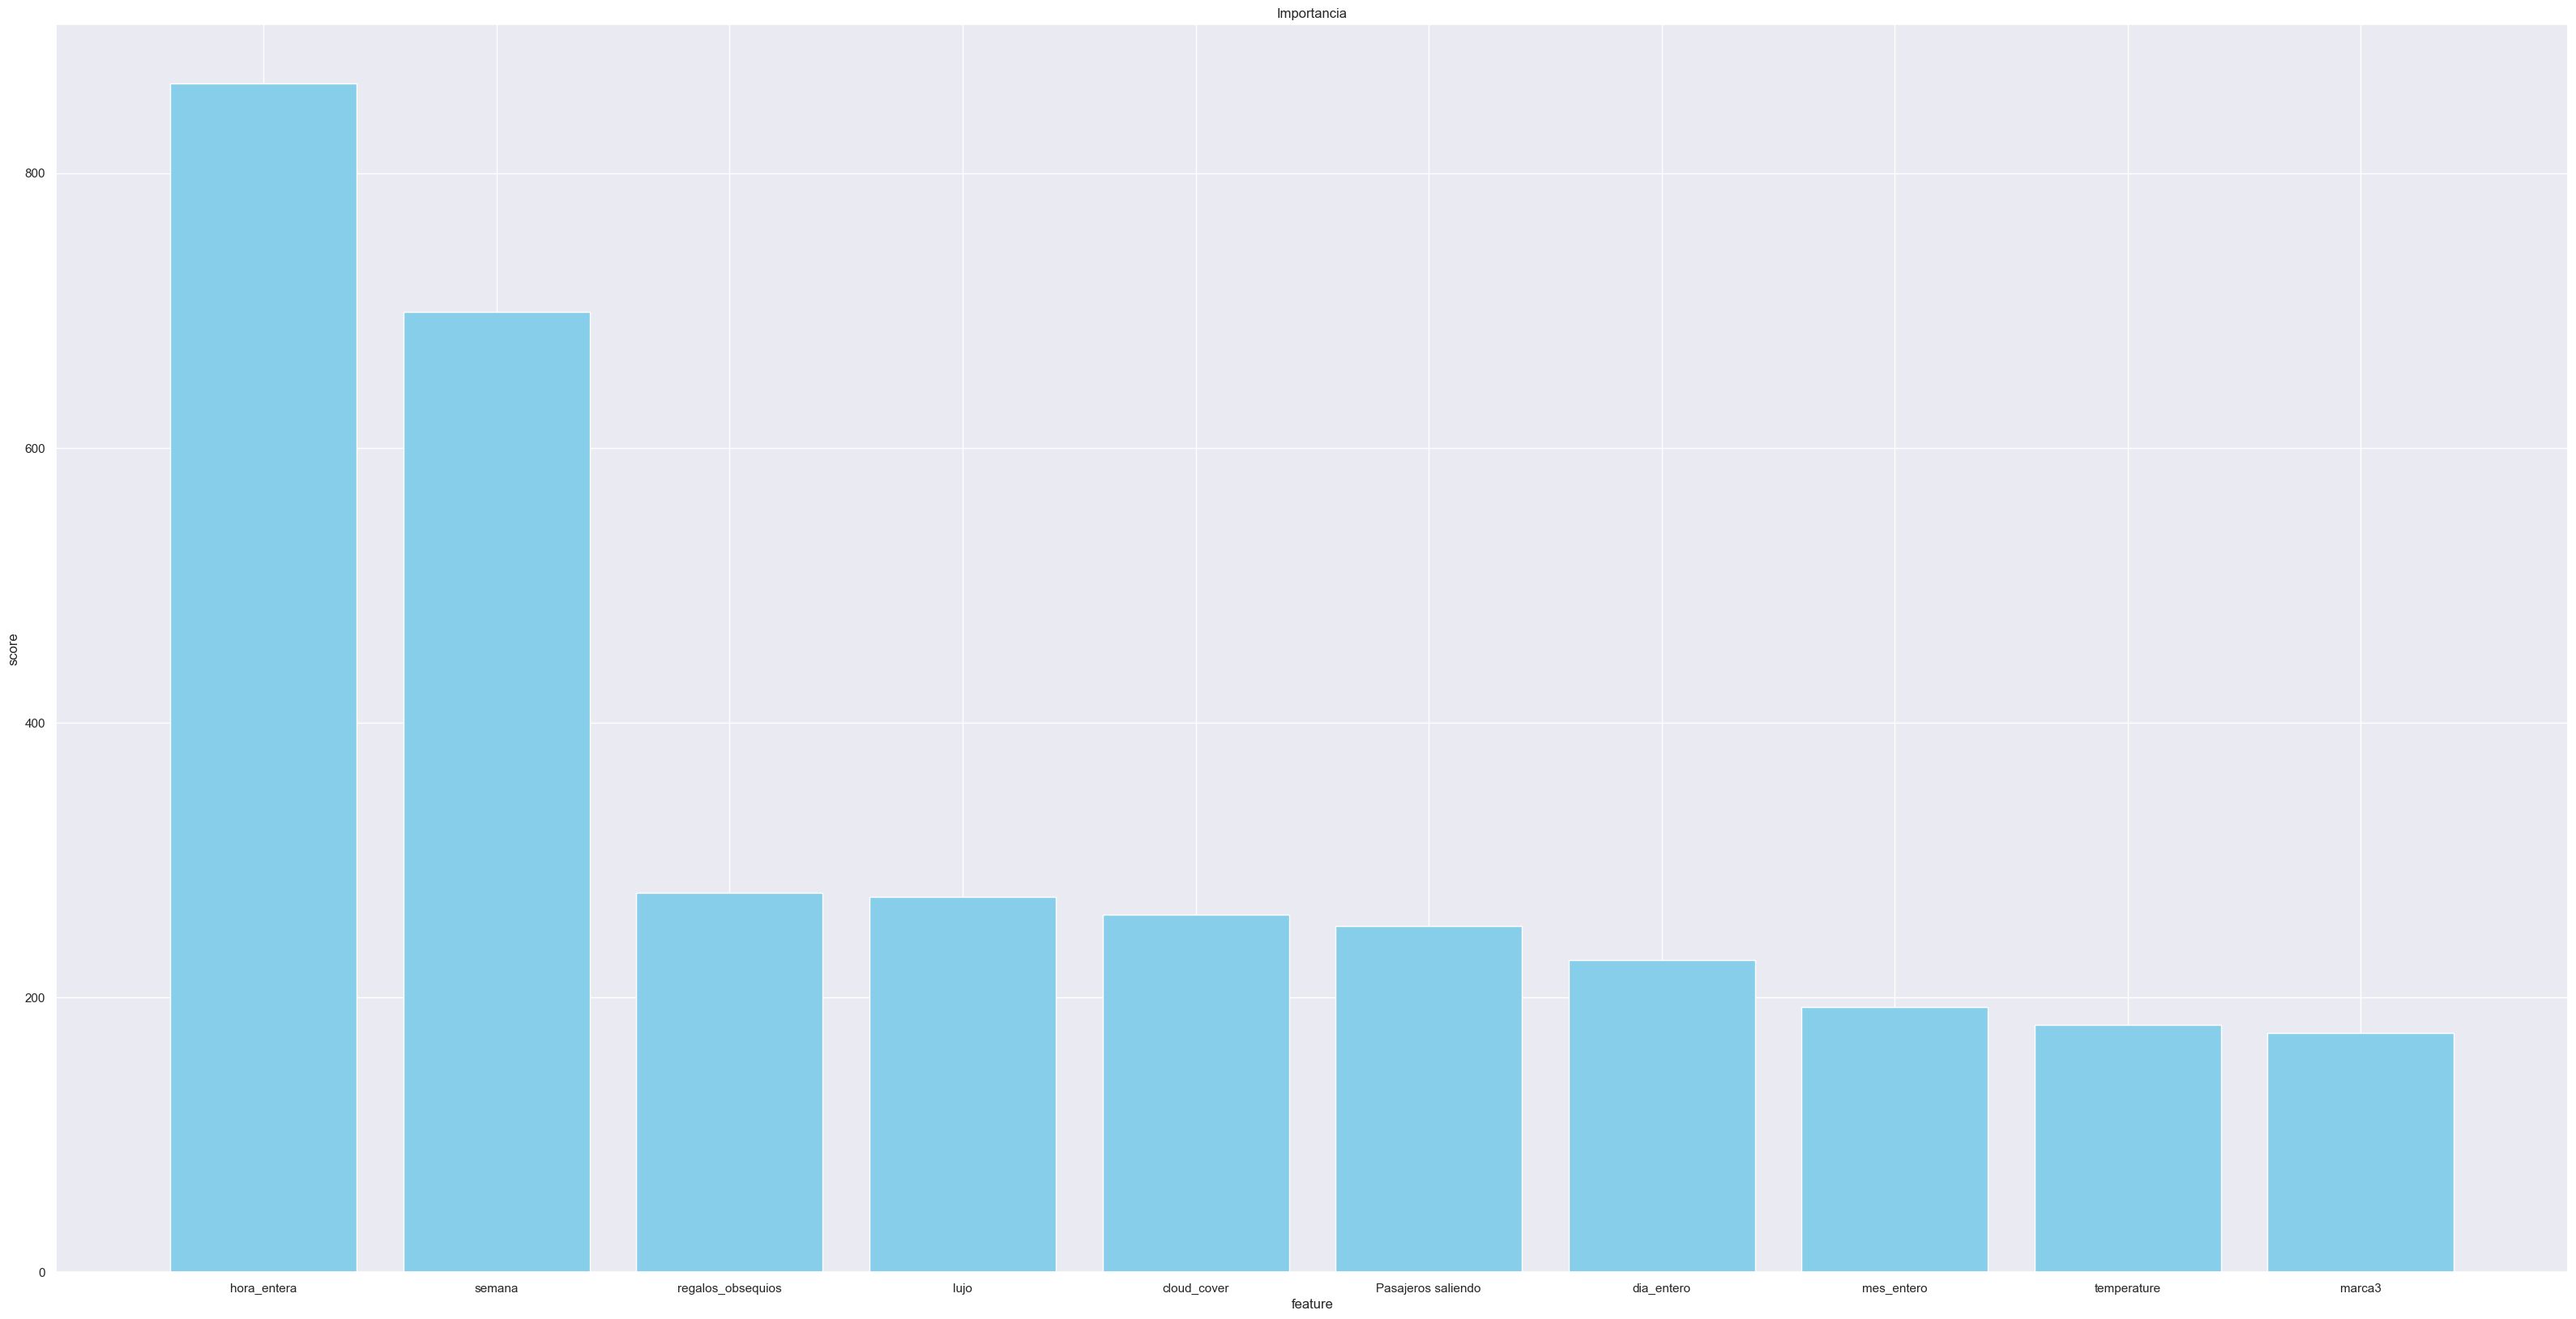

In [27]:
plt.figure(figsize=(40, 20))
plt.bar(plot['feature'], plot['score'], color='skyblue')
plt.xlabel('feature')
plt.ylabel('score')
plt.title('Importancia')

# Mostrar el diagrama de barras
plt.show()

## Modelo sin marcas, aerolíneas, tiendas ni categorías no especificas

In [31]:
target2=["ventas"]
drop=target2+catego2+aerolinea+tienda+marca

In [32]:
X = df_final.drop(columns=drop)
y = df_final['ventas']
# X['transacciones'].fillna(0, inplace=True)

# drop_cols = X.isna().sum().to_frame()
# drop_cols =drop_cols.loc[drop_cols[0] > 0]
# X = X.drop(columns=drop_cols.index.array)
# X.isna().sum().to_frame()

X_train = X[X['anio_entero']==2022]
X_test = X[X['anio_entero']==2023]
y_train = y[X['anio_entero']==2022]
y_test = y[X['anio_entero']==2023]

In [33]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10]
}

lgbm = lgb.LGBMRegressor()

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1232
[LightGBM] [Info] Number of data points in the train set: 71238, number of used features: 98
[LightGBM] [Info] Start training from score 22214582.418758


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 5, 10],
                         'min_data_in_leaf': [30, 50, 100],
                         'num_leaves': [31, 50, 70], 'reg_alpha': [0.1, 0.5]},
             scoring='r2', verbose=1)

In [34]:
# Mejores parámetros LBBMRegressor sin categorias
best_params_lgbm_con_vuelos = grid_search.best_params_
best_model_lgbm__con_vuelos = grid_search.best_estimator_

print(f"Mejores parámetros encontrados: {best_params_lgbm_con_vuelos}")

Mejores parámetros encontrados: {'learning_rate': 0.05, 'max_depth': -1, 'min_data_in_leaf': 100, 'num_leaves': 70, 'reg_alpha': 0.5}


In [35]:
# Evaluar para train y test. MAE, RMSE y R2
y_train_pred = best_model_lgbm__con_vuelos.predict(X_train)
y_test_pred = best_model_lgbm__con_vuelos.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MAE train: {mae_train}")
print(f"MAE test: {mae_test}")
print()
print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")
print()
print(f"R2 train: {r2_train}")
print(f"R2 test: {r2_test}")

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
MAE train: 8907448.70324881
MAE test: 12131249.396898706

RMSE train: 17786849.75307269
RMSE test: 22361158.304637056

R2 train: 0.7943352266131772
R2 test: 0.7075487208638147


In [36]:
# Supongamos que 'modelo' es tu modelo entrenado
# Guardar el modelo en un archivo
joblib.dump(best_model_lgbm__con_vuelos, 'modelo_sin_marca_categoGen_aero_tiendas.joblib')

['modelo_sin_marca_categoGen_aero_tiendas.joblib']

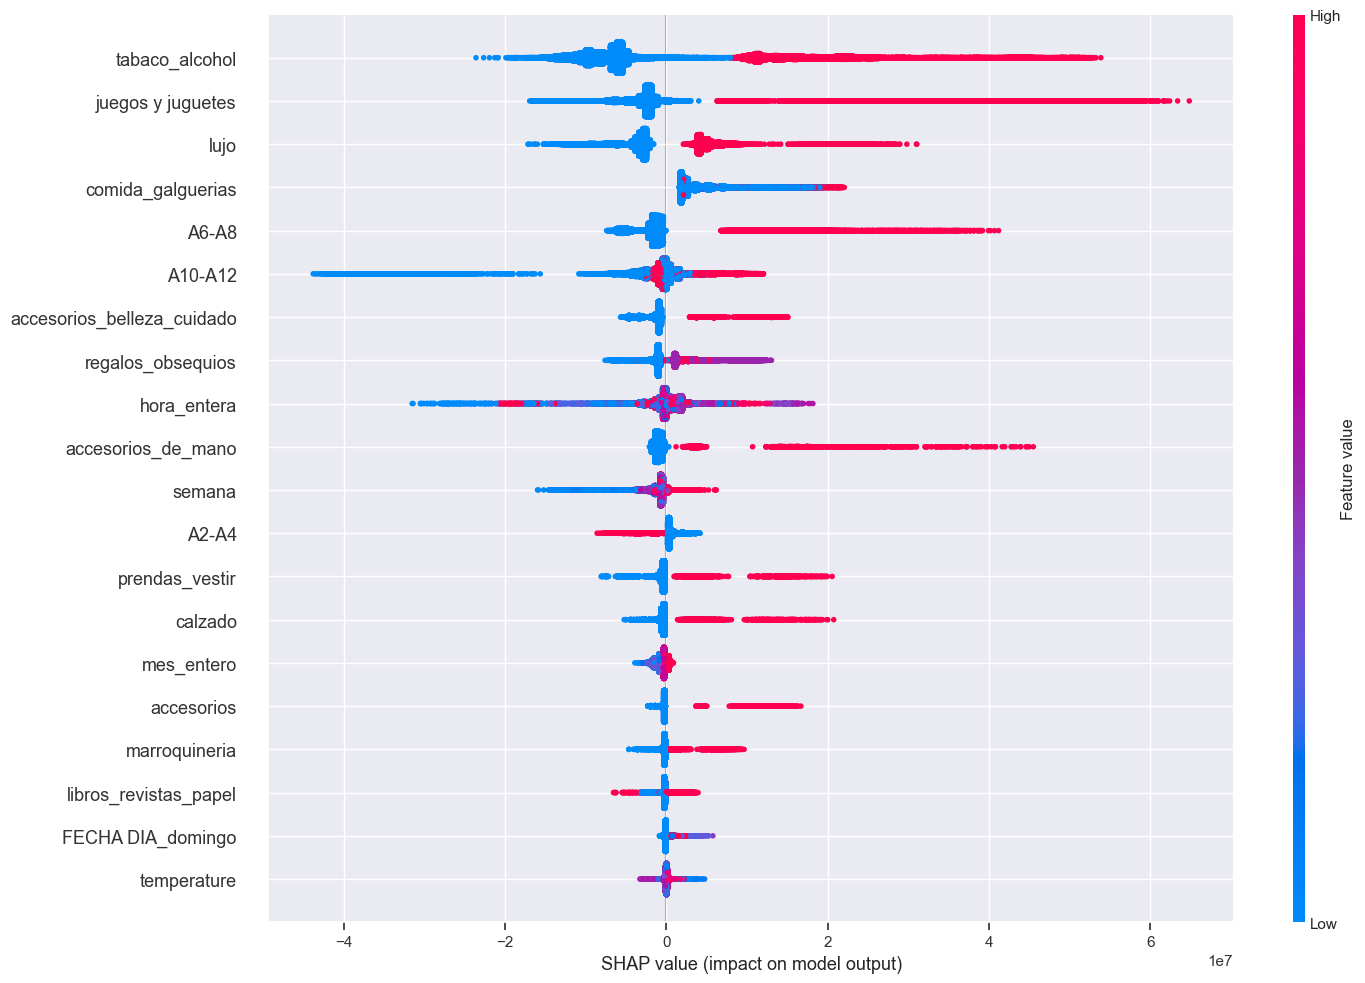

In [37]:
explainer = shap.TreeExplainer(best_model_lgbm__con_vuelos)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_size=(15, 10))

In [38]:
importances =pd.DataFrame({'feature': X_test.columns.array, 'score': best_model_lgbm__con_vuelos.feature_importances_})
importances.sort_values(by='score', ascending=False, inplace=True)

plot = importances.head(10)

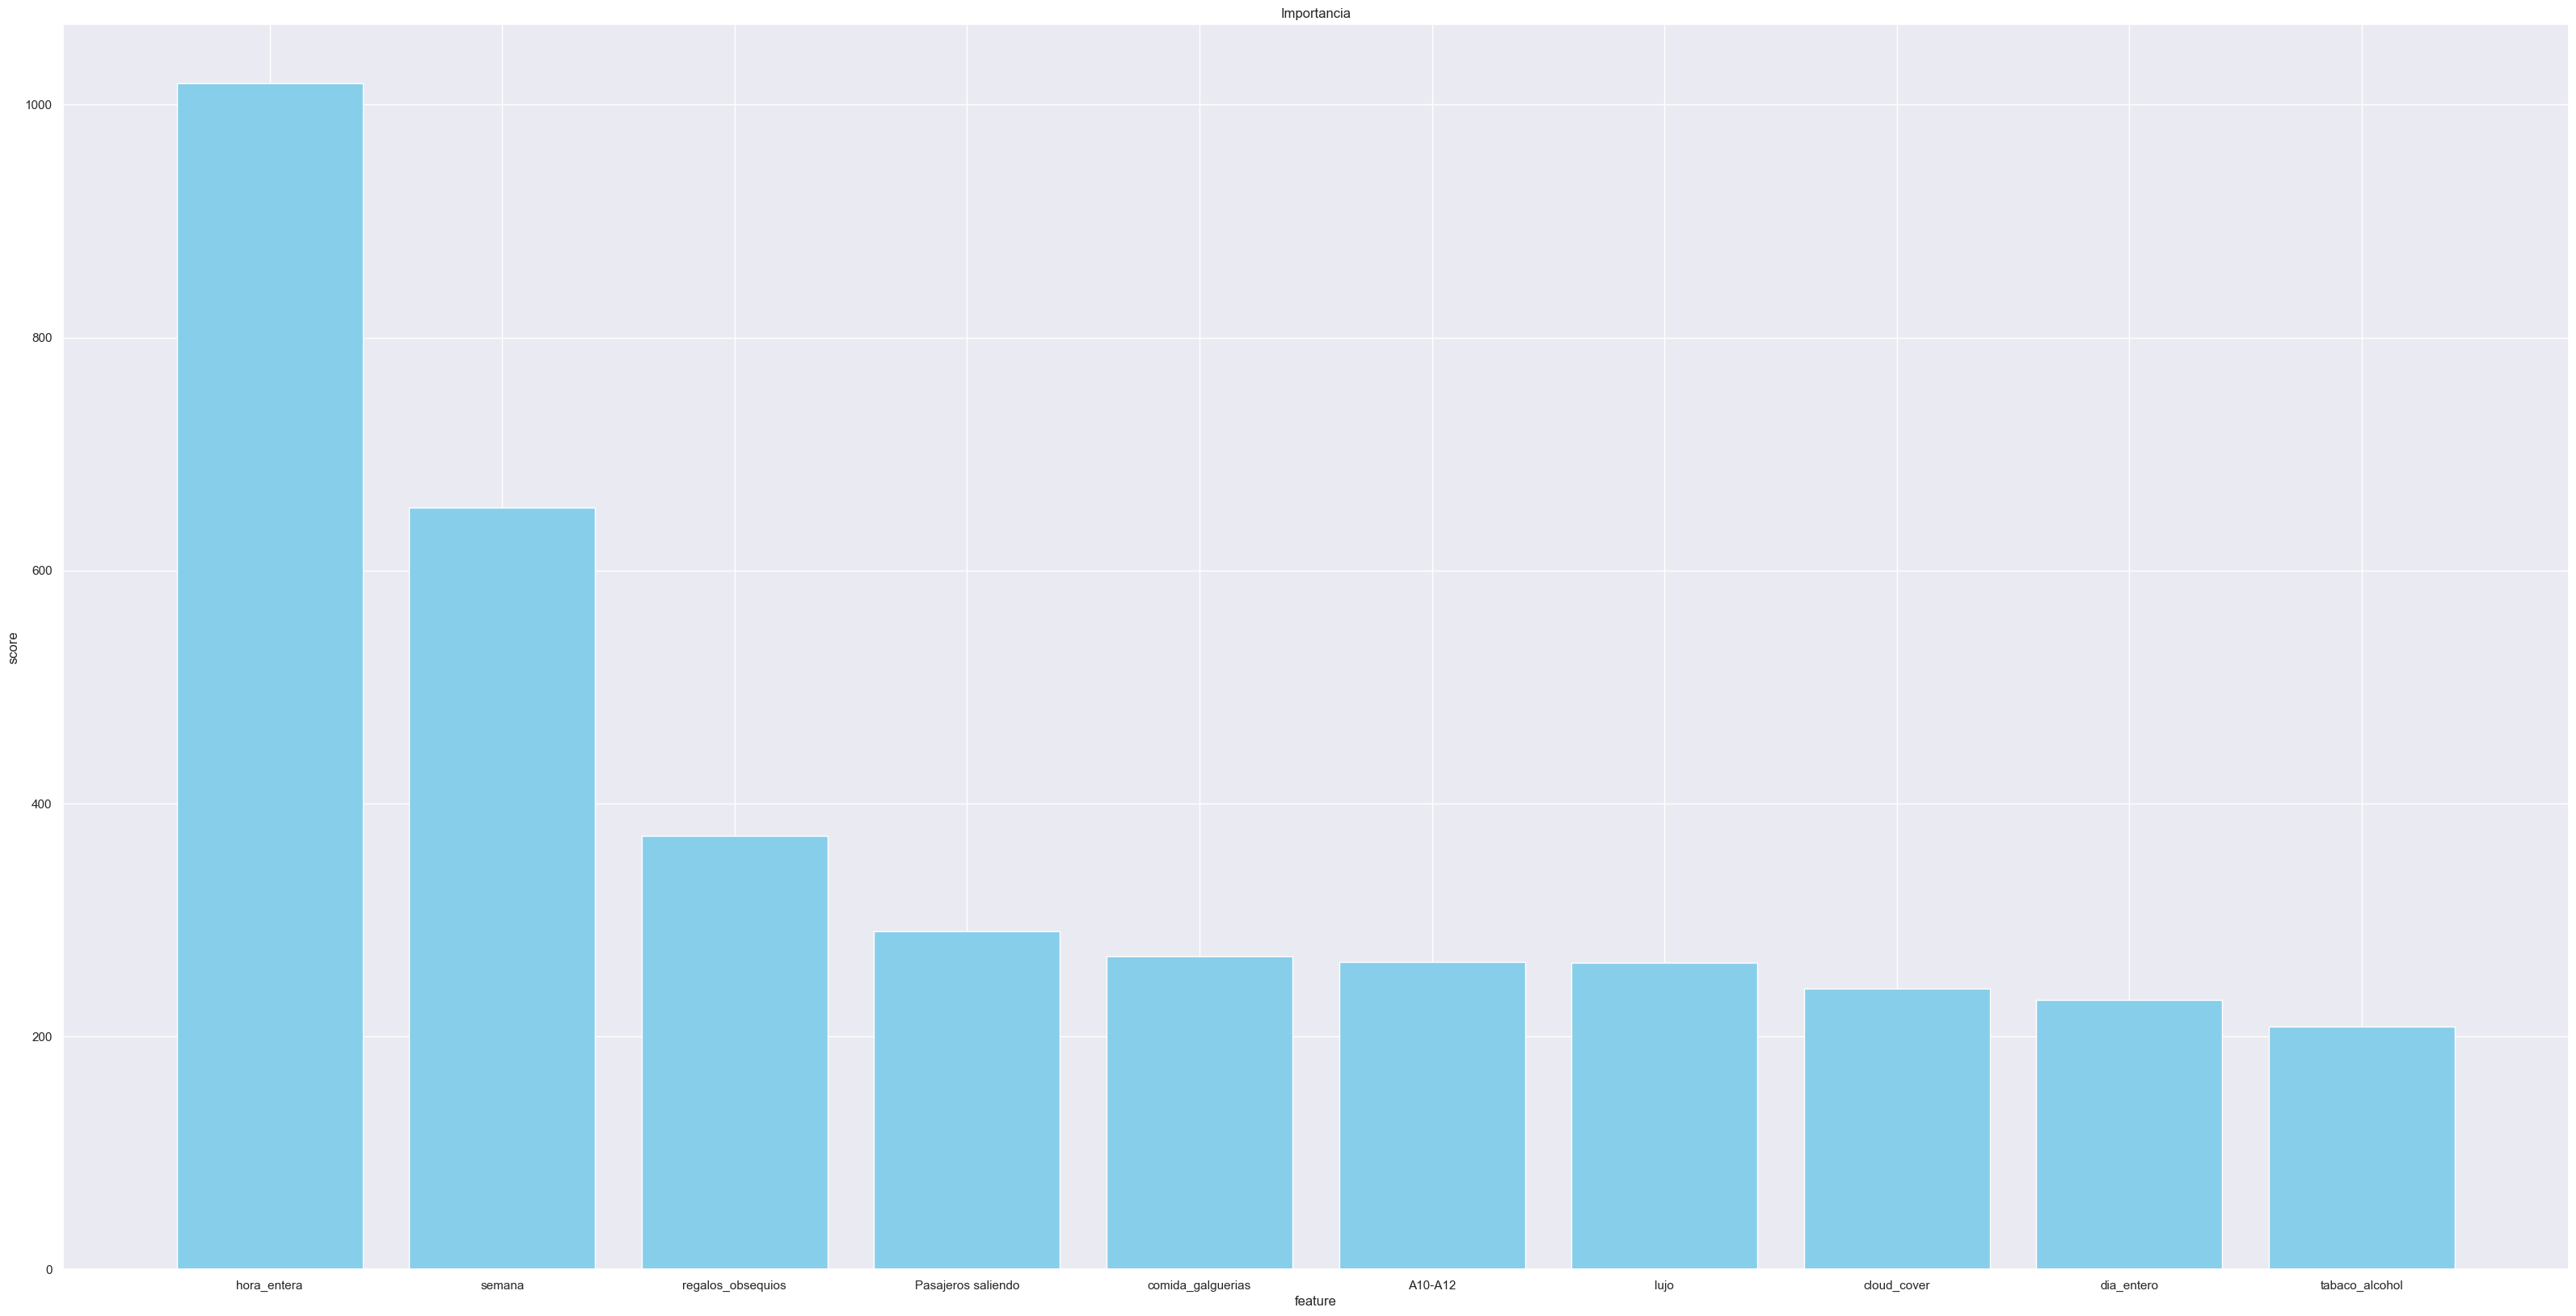

In [39]:
plt.figure(figsize=(40, 20))
plt.bar(plot['feature'], plot['score'], color='skyblue')
plt.xlabel('feature')
plt.ylabel('score')
plt.title('Importancia')

# Mostrar el diagrama de barras
plt.show()

## Modelo sin marcas tiendas ni categorías no especificas

In [40]:
target2=["ventas"]
drop=target2+catego2+tienda+marca

In [41]:
X = df_final.drop(columns=drop)
y = df_final['ventas']
# X['transacciones'].fillna(0, inplace=True)

# drop_cols = X.isna().sum().to_frame()
# drop_cols =drop_cols.loc[drop_cols[0] > 0]
# X = X.drop(columns=drop_cols.index.array)
# X.isna().sum().to_frame()

X_train = X[X['anio_entero']==2022]
X_test = X[X['anio_entero']==2023]
y_train = y[X['anio_entero']==2022]
y_test = y[X['anio_entero']==2023]

In [42]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10]
}

lgbm = lgb.LGBMRegressor()

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1313
[LightGBM] [Info] Number of data points in the train set: 71238, number of used features: 125
[LightGBM] [Info] Start training from score 22214582.418758


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [-1, 5, 10],
                         'min_data_in_leaf': [30, 50, 100],
                         'num_leaves': [31, 50, 70], 'reg_alpha': [0.1, 0.5]},
             scoring='r2', verbose=1)

In [43]:
# Mejores parámetros LBBMRegressor sin categorias
best_params_lgbm_con_vuelos = grid_search.best_params_
best_model_lgbm__con_vuelos = grid_search.best_estimator_

print(f"Mejores parámetros encontrados: {best_params_lgbm_con_vuelos}")

Mejores parámetros encontrados: {'learning_rate': 0.05, 'max_depth': -1, 'min_data_in_leaf': 100, 'num_leaves': 70, 'reg_alpha': 0.1}


In [44]:
# Evaluar para train y test. MAE, RMSE y R2
y_train_pred = best_model_lgbm__con_vuelos.predict(X_train)
y_test_pred = best_model_lgbm__con_vuelos.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MAE train: {mae_train}")
print(f"MAE test: {mae_test}")
print()
print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")
print()
print(f"R2 train: {r2_train}")
print(f"R2 test: {r2_test}")

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
MAE train: 8896343.743350916
MAE test: 12128998.441246787

RMSE train: 17769446.63107211
RMSE test: 22354600.0239104

R2 train: 0.7947374853825395
R2 test: 0.7077202411670565


In [45]:
# Guardar el modelo en un archivo
joblib.dump(best_model_lgbm__con_vuelos, 'modelo_sin_marca_categoGen_tiendas.joblib')

['modelo_sin_marca_categoGen_tiendas.joblib']

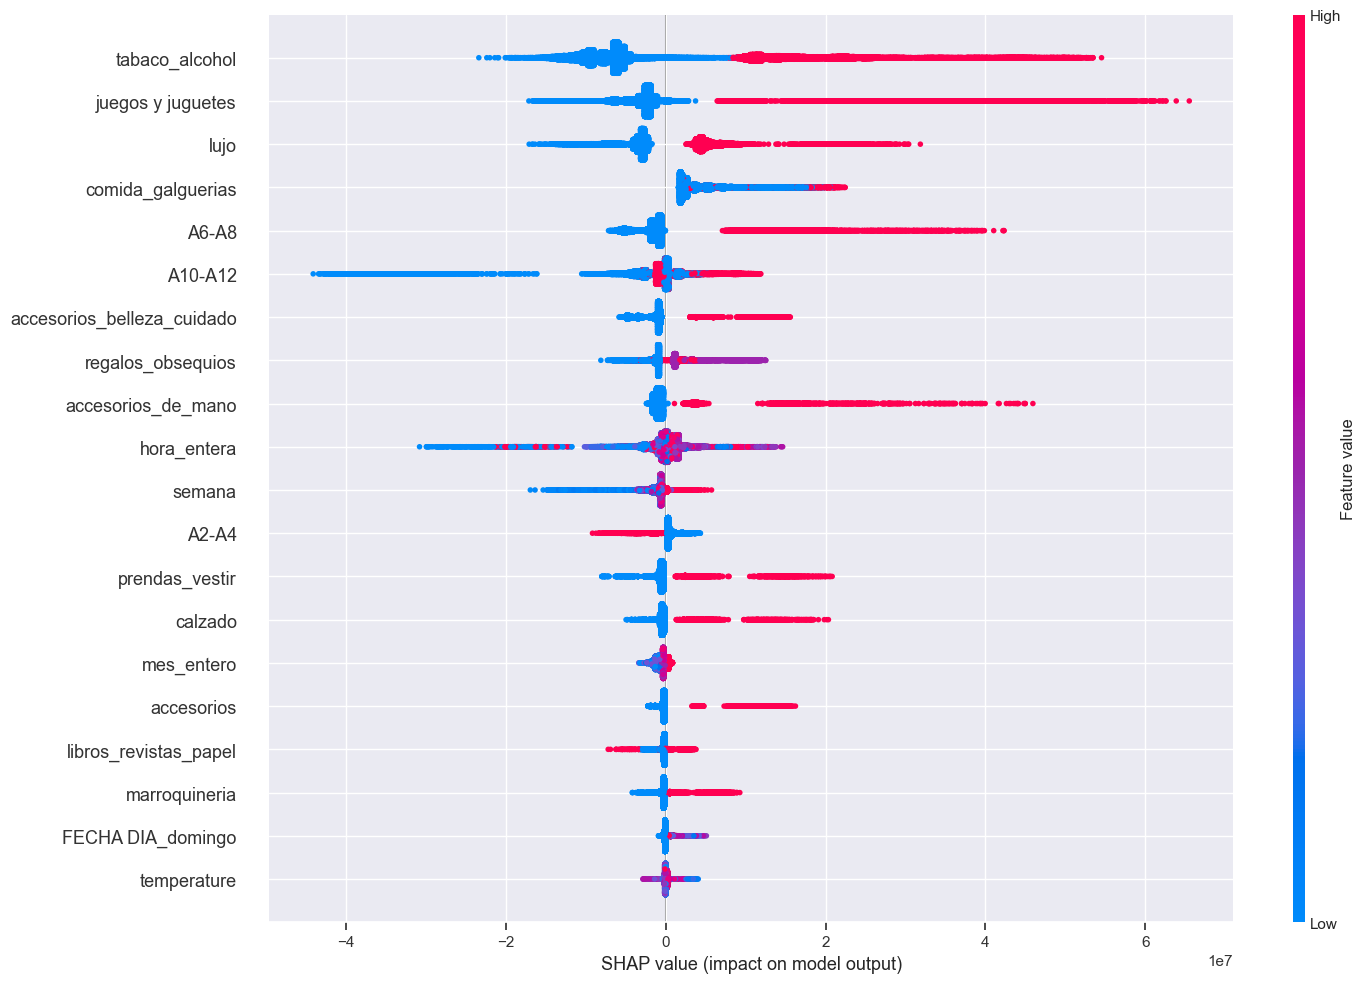

In [46]:
explainer = shap.TreeExplainer(best_model_lgbm__con_vuelos)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_size=(15, 10))

In [47]:
importances =pd.DataFrame({'feature': X_test.columns.array, 'score': best_model_lgbm__con_vuelos.feature_importances_})
importances.sort_values(by='score', ascending=False, inplace=True)

plot = importances.head(10)

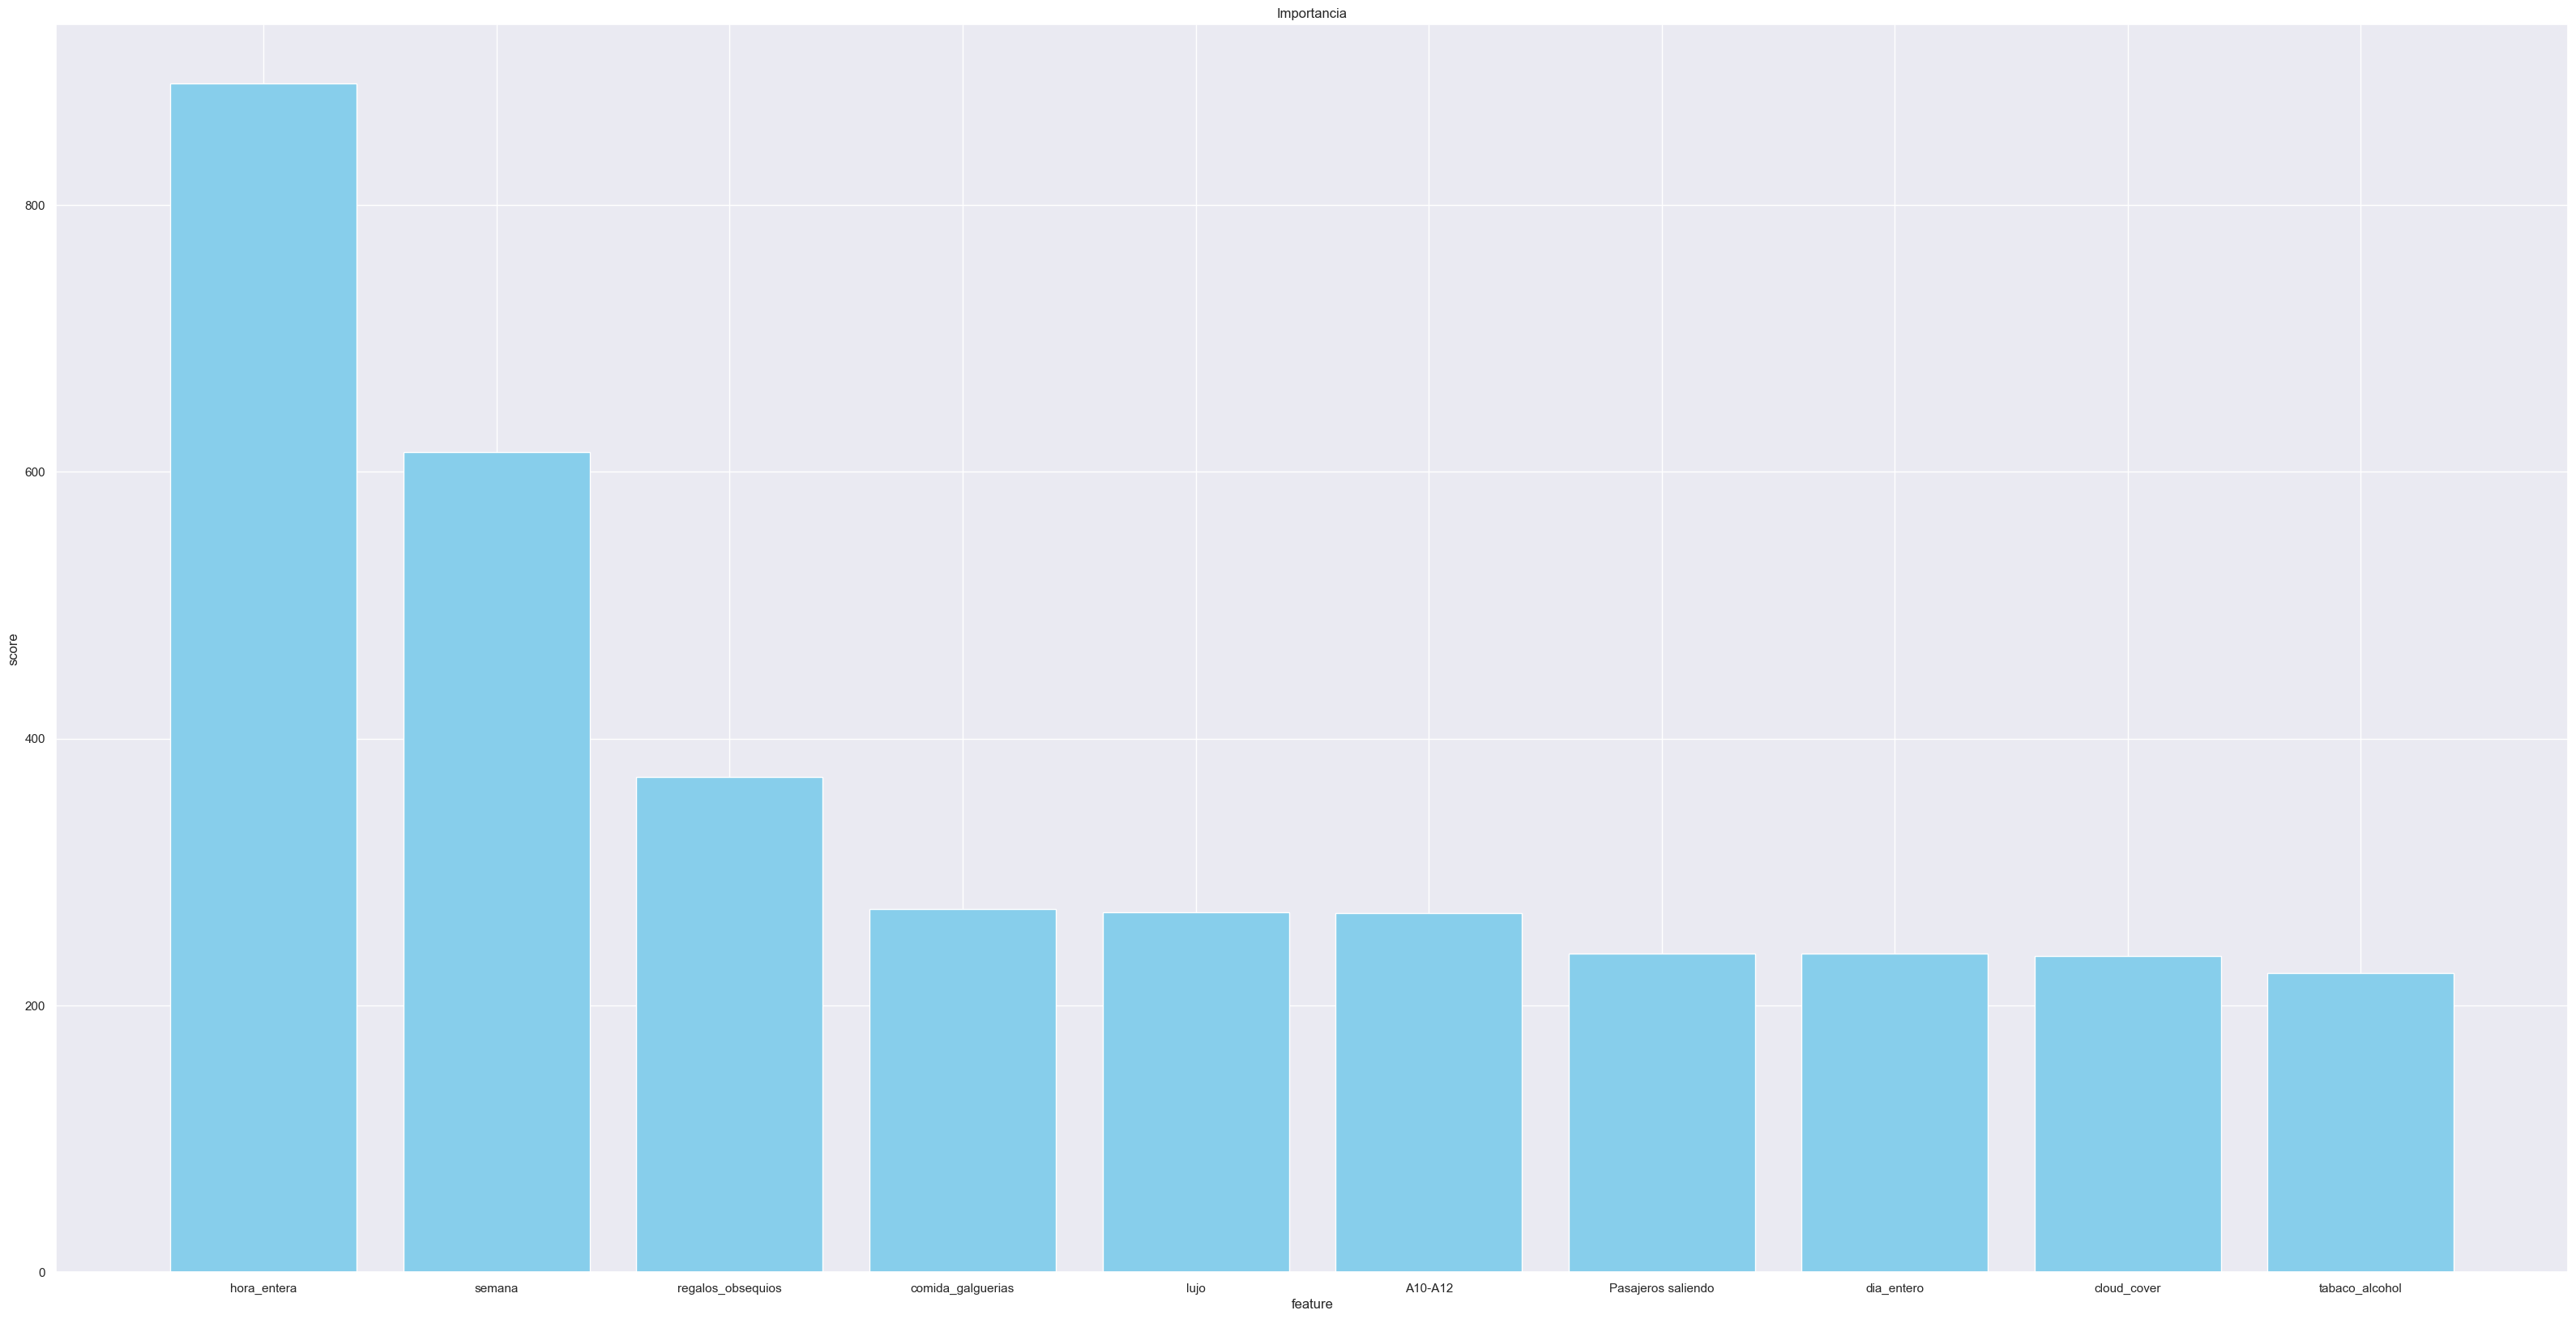

In [48]:
plt.figure(figsize=(40, 20))
plt.bar(plot['feature'], plot['score'], color='skyblue')
plt.xlabel('feature')
plt.ylabel('score')
plt.title('Importancia')

# Mostrar el diagrama de barras
plt.show()